# Project: Investigation of tmdb-movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The following analysis will investigate the tmdb movie database with data from movies from 1960 till 2015.

The report will be divided into two part. The first part will give a general overview of the data and shortly dive into some interesting observations:

- How many production firms have been involved in the production of movies since the 1960s?
- How many production firms in average are involved in the production of a movie? 
- What was the year with most releases?
- How did movie revenue develop over time?
- How is popularity trendind over time?
- How is runtime trending over time?
- How did spending (budget) in movie production develop over time?
- What genre was the most represented since the 1960s? 
- Who were the top 10 actors in terms of appearances? 
- What movie had the highest revenue?
- What movie had the highest budget?

The second part will focus on trying to understand what variables impact the economic success of a movie. Given that the film industry invests billions in movie production, understanding what variables could influence economic success is key. Furthermore, with the film industry facing a gloomy forecast of stagnation and slow growth <a href="#source">(1)</a> it will be interesting to understand if there are movies that have a better chance to succeed than others. 
Therefore I will dive into following questions:

- Does a larger budget have an impact on movie success?
- Is popularity related to economic success?
- What genres are related to a better economic success?
- What genres are more popular?
- Is there a relationship between the season of the release and the success of a movie?

To provide the mentioned insights and answer all the listed questions I will go through further steps of the data analysis process as described below.

1. Data wrangling: 
    - Gather the data
    - Assess the data by checking its structure and quality
    - Cleaning the data to make sure it can be used for further analysis
2. Exploration: Look into the data to be able to provided the listed insights and answer the mentioned questions
3. Draw up conclusions based on the exploration made

<a id='wrangling'></a>
## Data Wrangling

### Gather the data

To begin the exploration of the tmdb-movies I first imported all necessary libraries and opened the file to be explored. I then saved the file in the variable `df_movies`.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib

df_movies = pd.read_csv('tmdb-movies.csv')
df_movies.head()

Using matplotlib backend: MacOSX


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### Assess the data

Now I will dive deeper into the data and its structure. 

First, I will gain a general overview of the data structure. 

In [2]:
df_movies.shape

(10866, 21)

Now, I want to know what was the first year with a data entry

In [3]:
df_movies.release_year.min()

1960

And also want to explore which was the last year with a data entry. 

In [4]:

df_movies.release_year.max()

2015

To know if all years are taken into account in the data set, I want to see how many years appear in the data set and list of all unique years. 

In [5]:
df_movies.release_year.nunique()

56

In [6]:
df_movies.release_year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 1968, 1974, 1975, 1962, 1964, 1971, 1990, 1961,
       1960, 1976, 1993, 1967, 1963, 1986, 1973, 1970, 1965, 1969, 1978,
       1966])

A quick overview of the data structure shows that the original data set has 10,866 rows and 21 columns and contains information from the year 1960 till the year 2015.

Looking deeper into the data set I want to get an overview of all columns to check of the names are appropriate.

In [7]:
for index, values in enumerate(df_movies.columns):
    print(index, values)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


Here I wanted to get a general overview of and data types to assess the quality of the data entries.
Multiple columns have null-value like e.g. cast, home_page, keywords and production_companies.
The data types in all columns but release_date are appropriate. The data type for the release_date should be a date time object.

In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Using the `describe()` method to generates descriptive statistics that summarize the characteristics of 
a dataset's distribution we can also see some interesting facts about the data:

- The mean adjusted budget for all movies is around 17,5 million and in comparison the mean adjusted revenue amounts to more than 51 million. (There is not information on the currency of the budget or the revenue, but given that the data set is in english for this exercise we will assume the currency is in US-dollars.)
- The runtime average is around 102 minutes, but the longest movie amounts to 15 hours. Through a further query we can see that the longest movie is a documentary called "The Story of Film: An Odysee".
- Popularity ranges from 0 to about 33 points

In [9]:
df_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
df_movies.query('runtime == 900')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0


Unsing the `pd.query()` method I found that the columns "runtime", "budget_adj" and "revenue_adj" have multiple values that are not null but contain a zero, i.e. there is no information. These values will have to be treated as nulls in the cata cleaning section. 

In [11]:
df_movies.query('runtime == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
334,361931,tt5065822,0.357654,0,0,Ronaldo,Cristiano Ronaldo,http://www.ronaldothefilm.com,Anthony Wonke,Astonishing. Intimate. Definitive.,...,Filmed over 14 months with unprecedented acces...,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,353345,tt3800796,0.218528,0,0,The Exorcism of Molly Hartley,Sarah Lind|Devon Sawa|Gina Holden|Peter MacNei...,NaN,Steven R. Monroe,NaN,...,Taking place years after The Haunting of Molly...,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
486,333653,tt4058368,0.176744,0,0,If There Be Thorns,Heather Graham|Jason Lewis|Rachael Carpani|Mas...,NaN,Nancy Savoca,NaN,...,The third installment in V.C. Andrewsâ€™ bests...,0,TV Movie|Drama,A+E Studios|Jane Startz Productions,4/5/15,11,5.4,2015,0.000000e+00,0.0
595,341051,tt2914740,0.028725,0,0,Deep Dark,Sean McGrath|Denise Poirier|Anne Sorce|Tabor H...,http://deepdarkmovie.com,Michael Medaglia,NaN,...,Fantasy - A failed sculptor discovers a strang...,0,Horror,NaN,1/1/15,11,4.6,2015,0.000000e+00,0.0
616,325843,tt4333210,0.026797,0,0,The Outfield,Cameron Dallas|Hamilton Nash Grier|Olivia Stuc...,NaN,Michael Goldfine,NaN,...,The film follows a trio of varsity baseball pl...,0,Drama|Comedy,NaN,11/10/15,20,6.6,2015,0.000000e+00,0.0
1241,296370,tt3024964,0.135376,0,0,Dance-Off,Kathryn McCormick|Shane Harper|Finola Hughes|C...,NaN,NaN,NaN,...,DANCE-OFF is a tongue-in-cheek family comedy s...,0,Romance|Music|Comedy,NaN,1/1/14,18,5.7,2014,0.000000e+00,0.0
1289,286372,tt1791681,0.037459,3250000,0,Treehouse,J. Michael Trautmann|Dana Melanie|Daniel Fredr...,http://www.imdb.com/title/tt1791681/,Michael G. Bartlett,No kids allowed,...,A teenage boy discovers the perpetrators of se...,0,Thriller|Horror|Mystery,Tiberius Film,10/20/14,16,3.4,2014,2.993546e+06,0.0
1293,286256,tt3134058,0.036904,0,0,Tim Maia,Robson Nunes|BabÃº Santana|Alinne Moraes|CauÃ£...,NaN,Mauro Lima,Original language PORTUGUESE,...,"Biopic of Brazilian singer Tim Maia, from his ...",0,Documentary|Drama|Music,Globo Filmes,10/30/14,14,6.0,2014,0.000000e+00,0.0


In [12]:
df_movies.query('budget_adj == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.000000e+00
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.000000e+00
88,301875,tt3289728,1.959765,0,2000000,Equals,Kristen Stewart|Nicholas Hoult|Guy Pearce|Jack...,http://equals-the-movie.com/,Drake Doremus,Find your equal.,...,A futuristic love story set in a world where e...,101,Drama|Romance|Science Fiction,Scott Free Productions|Infinite Frameworks Stu...,9/4/15,135,5.6,2015,0.0,1.839999e+06
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.0,0.000000e+00
95,258509,tt2974918,1.841779,0,233755553,Alvin and the Chipmunks: The Road Chip,Jason Lee|Justin Long|Bella Thorne|Matthew Gra...,http://www.foxmovies.com/movies/alvin-and-the-...,Walt Becker,Fast & furry-ous,...,"Through a series of misunderstandings, Alvin, ...",92,Adventure|Animation|Comedy|Family,Regency Enterprises|Fox 2000 Pictures|Sunswept...,12/17/15,278,5.7,2015,0.0,2.150550e+08
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.0,0.000000e+00
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.0,0.000000e+00


In [13]:
df_movies.query('revenue_adj == 0')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.000000e+00,0.0
92,370687,tt3608646,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,http://www.mythicamovie.com/#!blank/y9ake,A. Todd Smith,NaN,...,Mallister takes Thane prisoner and forces Mare...,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
93,307663,tt3480796,1.872696,10000000,0,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,NaN,Brian A Miller,Where the future is your past.,...,Julian Michaels has designed the ultimate reso...,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.0
100,326359,tt4007502,1.724712,0,0,Frozen Fever,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,NaN,Chris Buck|Jennifer Lee,NaN,...,"On Anna's birthday, Elsa and Kristoff are dete...",8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
101,254302,tt0462335,1.661789,0,0,High-Rise,Tom Hiddleston|Sienna Miller|Jeremy Irons|Luke...,NaN,Ben Wheatley,Leave the real world behind,...,Dr. Robert Laing is the newest resident of a l...,119,Action|Drama|Science Fiction,Ingenious Media|HanWay Films|Scope Pictures|Re...,9/26/15,161,5.4,2015,0.000000e+00,0.0
103,292040,tt3321300,1.646664,0,0,Spooks: The Greater Good,Peter Firth|Kit Harington|Jennifer Ehle|Lara P...,http://www.shinepictures.co.uk/films/9/spooks-...,Bharat Nalluri,NaN,...,During a handover to the head of counter-terro...,104,Thriller|Action,BBC Films|Isle of Man Film|Shine Pictures|Kudo...,4/11/15,114,5.6,2015,0.000000e+00,0.0
116,297291,tt3086386,1.380320,0,0,The Scorpion King: The Lost Throne,Victor Webster|Ellen Hollman|Barry Bostwick|Wi...,NaN,Mike Elliott,Action Adventure,...,"When he is betrayed by a trusted friend, Matha...",105,Action|Fantasy|Adventure,Universal Pictures,1/9/15,22,4.5,2015,0.000000e+00,0.0


Finally, there is one duplicate row that will have to be eliminated in the next step.

In [14]:
sum(df_movies.duplicated())

1

### Clean the data


Now that we have an overview of the data and its quality we can move to the next step and start cleaning the data. 

1. Eliminate the columns that won't be necessary to answer the predefined questions. Therefore we will eliminate "id", "imdb_id", "homepage", "tagline", "keywords", and "overview". We will also remove "budget" and "revenue" and continue the analysis with "budget_adj" and "revenue_adj" since these values are adjusted in terms of 2010 US-dollars accounting for inflation and will make revenue and budget form older movies comparable to more recent movies. 

2. Drop the one duplicate row.

3. Change the data type of "release_date"

4. Fill out the missing values; Both nulls as well as zeros

__Eliminate unnecessary columns__

First, I want to drop all columns that won't be needed in the analysis. 
After ever action I want to check if it was properly done. In this case I had 21 columns, I dropped 8 so the action worked.

In [15]:
df_movies.drop(['id','imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)
df_movies.shape

(10866, 13)

__Drop duplicate rows__

Second, I want to eliminate the duplicated row and check if it worked correctly. There were 10866 rows before, I dropped one so the action worked.

In [16]:
df_movies.drop_duplicates(inplace = True)
df_movies.shape

(10865, 13)

__Correct data types__

Third, I corrected the data type of 'release_date' and checked to see if the changes were applied in the entire table.

In [17]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], format = '%m/%d/%y')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.2+ MB


In [18]:
df_movies.head(4)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [19]:
df_movies.tail(200)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10666,0.284436,Colossus: The Forbin Project,Eric Braeden|Susan Clark|Gordon Pinsent|Willia...,Joseph Sargent,100,Science Fiction|Thriller,Universal Pictures,1970-04-08,17,6.6,1970,0.000000e+00,0.000000e+00
10667,0.281532,Soldier Blue,Candice Bergen|Peter Strauss|Donald Pleasence|...,Ralph Nelson,112,Action|Drama|Romance|Western,AVCO Embassy Pictures|Katzka-Loeb,1970-08-12,18,7.1,1970,0.000000e+00,0.000000e+00
10668,0.268472,The Twelve Chairs,Ron Moody|Frank Langella|Dom DeLuise|AndrÃ©as ...,Mel Brooks,94,Comedy,Crossbow Productions|The Twelve Chairs Company,1970-10-28,10,6.1,1970,0.000000e+00,0.000000e+00
10669,0.424430,Scrooge,Albert Finney|Edith Evans|Kenneth More|Laurenc...,Ronald Neame,113,Fantasy|Drama|Family,Cinema Center Films|Waterbury Films,1970-11-05,17,5.8,1970,0.000000e+00,0.000000e+00
10670,0.250313,"Nachts, wenn Dracula erwacht",Christopher Lee|Klaus Kinski|Herbert Lom|Maria...,JesÃºs Franco,98,Horror,FÃ©nix Cooperativa CinematogrÃ¡fica|Corona Fil...,1970-04-03,10,6.4,1970,0.000000e+00,0.000000e+00
10671,0.244412,Performance,James Fox|Mick Jagger|Anita Pallenberg|MichÃ¨l...,Nicolas Roeg|Donald Cammell,101,Music|Drama|Crime,Goodtimes Enterprises|Warner Bros.,1970-08-03,24,6.2,1970,0.000000e+00,0.000000e+00
10672,0.218311,Five Easy Pieces,Jack Nicholson|Karen Black|Billy Green Bush|Fa...,Bob Rafelson,98,Drama,Raybert Productions,1970-09-12,42,6.8,1970,0.000000e+00,0.000000e+00
10673,0.209070,The Wizard of Gore,Ray Sager|Judy Cler|Wayne Ratay|Phil Laurenson...,Herschell Gordon Lewis,95,Horror,Mayflower Pictures,1970-10-23,12,4.3,1970,3.369821e+05,0.000000e+00
10674,0.203225,Woodstock,Joe Cocker|Richie Havens|Joan Baez|Arlo Guthri...,Michael Wadleigh,225,Documentary|Music,Wadleigh-Maurice,1970-03-26,33,6.2,1970,0.000000e+00,0.000000e+00
10675,0.193759,The Ballad of Cable Hogue,Jason Robards|Stella Stevens|David Warner|Slim...,Sam Peckinpah,121,Action|Comedy|Western,Warner Bros.,1970-05-13,19,7.3,1970,2.087574e+07,1.965729e+07


The transformation of "release_year" did not work properly for years early years. A look into the documentation shows a problem with year-mapping: 

*"Year 2000 (Y2K) issues: Python depends on the platform’s C library, which generally doesn’t have year 2000 issues, since all dates and times are represented internally as seconds since the epoch. Function strptime() can parse 2-digit years when given %y format code. When 2-digit years are parsed, they are converted according to the POSIX and ISO C standards:#values 69–99 are mapped to 1969–1999, and values 0–68 are mapped to 2000–2068.<a href="#source">(2)</a>.* 

This has to be corrected and it has to be checked if all worked properly.

In [20]:
def change_date(x):
    '''This function takes all values in the future (in case of this data set all values after 2015)
    and substracts a century to correct the Y2K issue'''
    if x.year > 2015:
        return x.replace(year = x.year -100)
    else:
        return x

    
df_movies['release_date'] = df_movies['release_date'].apply(change_date)
df_movies.tail()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,1966-06-15,11,7.4,1966,0.000000,0.0
10862,0.065543,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,1966-12-21,20,5.7,1966,0.000000,0.0
10863,0.065141,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,1966-01-01,11,6.5,1966,0.000000,0.0
10864,0.064317,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,1966-11-02,22,5.4,1966,0.000000,0.0
10865,0.035919,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,74,Horror,Norm-Iris,1966-11-15,15,1.5,1966,127642.279154,0.0


In [21]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null datetime64[ns]
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              10865 non-null float64
revenue_adj             10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.2+ MB


As we saw during the data assessment multiple relevant columns have zeros for values (e.g. runtime or budget_adj). 
If we drop all these values we will lose too much data, so we will treat them as null values and fill them with the mean.
All colums with data type int ot float have been checked for zeros and only runtime, budjet_adj, and revenue_adj have zeros, therefore only these columns will be taken into account for further data cleaning.

In [22]:
runtime_avg = df_movies['runtime'].mean()
df_movies['runtime'].replace(0, runtime_avg, inplace = True)

In [23]:
df_movies.query('runtime == 0')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [24]:
budget_avg = df_movies['budget_adj'].mean()
df_movies['budget_adj'].replace(0, budget_avg, inplace = True)

In [25]:
df_movies.query('budget_adj == 0')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [26]:
revenue_avg = df_movies['revenue_adj'].mean()
df_movies['revenue_adj'].replace(0, revenue_avg, inplace = True)

In [27]:
df_movies.query('revenue_adj == 0')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


Since we do not have an average value for cast, director, genre, and production_companies but don't want to drop all rows with null values to keep as much data as possible, I will have to fill them with a string objet I can recognize and filter afterwards. In this section I do exactly that and check if the changes were applied on every step.

In [28]:
df_movies['production_companies'].replace(np.NaN, 'Not available', inplace = True)

In [29]:
df_movies['production_companies'].isnull().sum()

0

In [30]:
df_movies['genres'].replace(np.NaN, 'Not available', inplace = True)

In [31]:
df_movies['genres'].isnull().sum()

0

In [32]:
df_movies['cast'].replace(np.NaN, 'Not available', inplace = True)

In [33]:
df_movies['cast'].isnull().sum()

0

In [34]:
df_movies['director'].replace(np.NaN, 'Not available', inplace = True)

In [35]:
df_movies['director'].isnull().sum()

0

Now I have a clean data set I can continue working on. I will save this clean data set for use in the next section. 

In [36]:
df_movies.to_csv('df_movies_edited.csv', index = False)

<a id='eda'></a>
## Exploratory Data Analysis

First, I will try to gain some insights into the data by answering following questions.

- How many production firms have been involved in the production of movies since the 1960s?
- How many production firms in average are involved in the production of a movie? 
- What was the year with most releases?
- How did movie revenue develop over time?
- How is popularity trendind over time?
- How is runtime trending over time?
- How did spending (budget) in movie production develop over time?
- What genre was the most represented since the 1960s? 
- Who were the top 10 actors in terms of appearances? 
- What movie had the highest revenue?
- What movie had the highest budget?

Second, I will try to understand if certain variables impact success and if yes, then which ones they are. 

- Does a larger budget have an impact on movie success?
- Is popularity related to economic success?
- What genres are related to a better economic success?
- What genres are more popular?
- Is there a relationship between the season of the release and the success of a movie?

I will got through each question and provide the respective analysis in place. For this I will begin by opening the clean data set.

In [37]:
df_movies_clean = pd.read_csv('df_movies_edited.csv')
df_movies_clean.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


### General Insights:

#### How many production firms have been involved in the production of movies since the 1960s?

In [38]:
def count_unique_elements(input_series):
    '''This functions takes a series object as input and iterates through each row first spliting a string
    on '|' and then adding the element to a new list. Then a second iteration goes through the list and adds 
    unique elements to the unique_elements list. The output is thenthe length of the unique_elements list. '''
    unique_elements = []
    for element in input_series:
        sub_list = element.split('|')
        for item in sub_list:
            if item.lower() not in unique_elements:
                unique_elements.append(item.lower())
    return len(unique_elements)

production_companies = df_movies_clean["production_companies"]

print('There are {} active production firms between 1960 and 2015.'.format(count_unique_elements(production_companies)))

There are 7862 active production firms between 1960 and 2015.


#### How many production firms in average are involved in the production of a movie? 

In [39]:
def split_up_and_count(input_list):
    '''This function takes as input a series object and iterates through it, first splitting the string in each row,
    then counting the number of elements in that row and adding that number to a new list. The output is then a list
    with the number of elements in each row'''
    new_list = []
    for element in input_list:
        new_list.append(len(element.split("|")))
    return new_list

def compute_avg(input_list):
    '''This function takes as input a list and outputs the average of all entries in the list.'''
    average = sum(input_list)/len(input_list)
    return average
    
count_production_firms = split_up_and_count(production_companies)
avg_production_firm_by_movie = compute_avg(count_production_firms)
print('The average number of production companies involved in producing a movie is: {}'.format(avg_production_firm_by_movie))

The average number of production companies involved in producing a movie is: 2.232397606994938


#### What was the year with most releases?

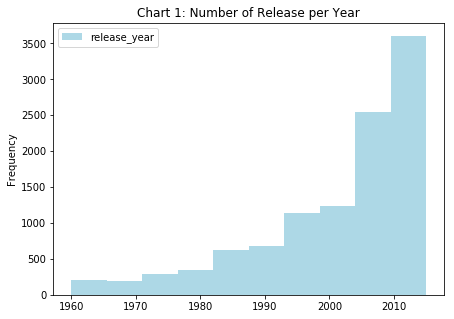

In [40]:
df_movies_clean['release_year'].plot(kind='hist', figsize = (7,5), title = 'Chart 1: Number of Release per Year', color ='lightblue', legend = True);

The distribution of the amount of movies released per year is strongly skewed to the left. The graph shows how the amount of produced movies per year has been strongly increasing through the years. After 2005 there was a great increase and the peak was achieved after 2010. This is probably due to the growth in the industry and the advances in technology that have made it possible to produce movies in a shorter amount of time. 

#### How did movie revenue develop over time? 

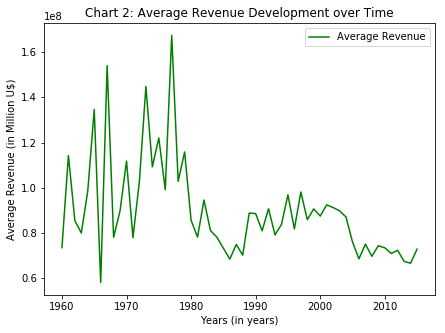

In [41]:
revenue_over_time = df_movies_clean.groupby(['release_year'],as_index = False)['revenue_adj'].mean()
x = revenue_over_time['release_year']
y_revenue = revenue_over_time['revenue_adj']

plt.figure(figsize = (7,5))
plt.plot(x,y_revenue, label = 'Average Revenue', color = 'green');
plt.legend()
plt.xlabel('Years (in years)')
plt.ylabel('Average Revenue (in Million U$)')
plt.title('Chart 2: Average Revenue Development over Time');

When analyzing chart 2 it becomes apparent that the revenue from movies between 1960 and 1980 had a high variability. Not only was the movie with the highest revenue made in this time, but also the movie with the smallest revenue. After this time variability decreased, however so did the level of revenue. Around the year 2006 there was a further decline in revenue that has not recovered again. From recent years one can only assume a stagnant development of revenue. 

#### How did spending (budget) in movie production develop over time?

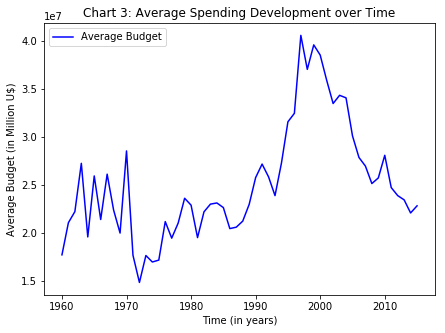

In [42]:
budget_over_time = df_movies_clean.groupby(['release_year'],as_index = False)['budget_adj'].mean()
x = budget_over_time['release_year']
y_budget = budget_over_time['budget_adj']

plt.figure(figsize = (7,5))
plt.plot(x,y_budget, label = 'Average Budget', color = 'blue');
plt.legend()
plt.xlabel('Time (in years)')
plt.ylabel('Average Budget (in Million U$)')
plt.title('Chart 3: Average Spending Development over Time');

Chart 3 shows that spending in movies had a major decline after 1970 and then began an upward trend that reached its peak in 1997. After this a downwards trends began reducing spending in movies. This could be due to the pressure caused by lower revenues, but it could also be caused by improving technology and digitization in the industry. Interestingly, budget spending increased during the same time as revenues decreased. It is also interesting to note that budget does not show the same variability than revenue. There is not enough information to say if spending will continue its downward trend or stabilize at the new lower level. 

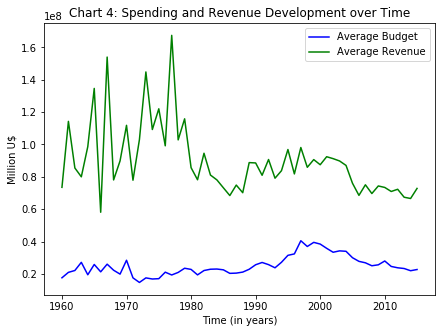

In [43]:
plt.figure(figsize = (7,5))
plt.plot(x,y_budget, label = 'Average Budget', color = 'blue')
plt.plot(x,y_revenue, label = 'Average Revenue', color = 'green')
plt.legend()
plt.xlabel('Time (in years)')
plt.ylabel('Million U$');
plt.title('Chart 4: Spending and Revenue Development over Time');

When plotting both lines together one can clearly see that budget variability is well below revenues. Also, low budgets in the 1960s and 1970s are related to some high revenue films in the same time period. One can also see the increase of budget that began when revenue plummeted. These facts can be taken to say that there is no strong relationship between budget spending and revenue, however, this question will be explored later in this report.

#### How is popularity trendind over time?

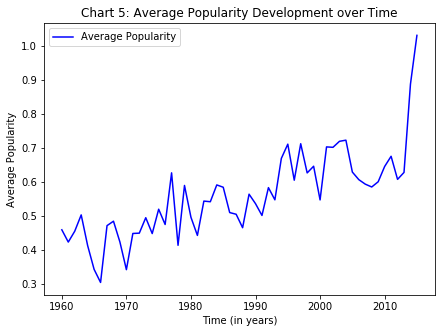

In [44]:
popularity_over_time = df_movies_clean.groupby(['release_year'],as_index = False)['popularity'].mean()
x = popularity_over_time['release_year']
y_pop = popularity_over_time['popularity']

plt.figure(figsize = (7,5))
plt.plot(x,y_pop, label = 'Average Popularity', color = 'blue');
plt.legend()
plt.xlabel('Time (in years)')
plt.ylabel('Average Popularity')
plt.title('Chart 5: Average Popularity Development over Time');

In chart 5 we can see that popularity of movies has has an upward trend since the 1970s. In 2015 popularity ratings achieved its highest point. However, as we can see in the y-axis the average popularity as a whole is quite low. If we look back at the data assessment and the statistical analysis through the `pd.describe()` method the maximal value for popularity is about 33 points. In this same overview we saw that the mean was 0.65, so popularity was only above average some years after 2000 and again after 2010 but in total has always been quite low. This could be an indicator that the market is very demanding regarding movies and is likely to give low popularity scores. 

#### How is runtime trendind over time?

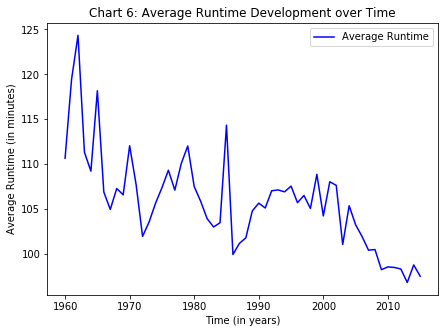

In [45]:
runtime_over_time = df_movies_clean.groupby(['release_year'],as_index = False)['runtime'].mean()
x = runtime_over_time['release_year']
y_runtime = runtime_over_time['runtime']

plt.figure(figsize = (7,5))
plt.plot(x,y_runtime, label = 'Average Runtime', color = 'blue');
plt.legend()
plt.xlabel('Time (in years)')
plt.ylabel('Average Runtime (in minutes)')
plt.title('Chart 6: Average Runtime Development over Time');

The development of runtime has been decreasing since the 1960s. Before the 1990s the volatility was still very high, since 1990 it has become a bit more stable. After 2010 average runtime achieved its lover point at about an average of 90 minutes per movie. From a subjective point of view, I believe movies nowadays have a fast story telling and a lot of action happens in a short amount of time, therefore 90 minutes is a good amount of time for a movie. However, I also believe that after 2015 the average will probably increase since movies are becoming longer and more complex. Nonetheless, we will have to wait for the data to confirm this hypothesis. 

#### What genre was the most represented since the 1960s?

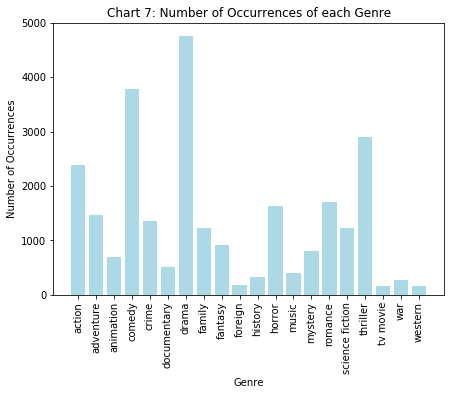

In [46]:
def get_clean_list(input_series):
    '''This function takes a series object as input and iterates through it by spliting the elements in a row
    on '|' and adding them all to a list. The output is then a list with all elements.'''
    clean_list = []
    for element in input_series:
        sub_list = element.split('|')
        for item in sub_list:
            clean_list.append(item.lower())
    return clean_list

def get_unique_elements_dict(input_list):
    '''This function takes a list as input and iterates through each unique element to a dictionary with the
    key value zero. The output is then a dictionary with all unique elements as 
    a dictionary and all key value with the value zero.'''
    unique_elements = {}
    for item in input_list:
        if item.lower() not in unique_elements:
            unique_elements[item.lower()] = 0
    return unique_elements

def count_occurrences(input_series):
    '''This function takes a series object as input, converts it to a list and then creates a dictionary
    only containing the unique elements of the list. Finally, the function iterates through the list counting the 
    occurrances of each element and adding it to the key value of the respective key. The output is then
    a dictionary with all unique elements and the number of occurrences in the original list.'''
    list_to_count_through = get_clean_list(input_series)
    dict_to_count = get_unique_elements_dict(list_to_count_through)
    for element in list_to_count_through:
        dict_to_count[element]+=1
    return dict_to_count
    

genres = df_movies_clean['genres']
occurences_genres = count_occurrences(genres)
del occurences_genres['not available'] #previously we replaced all zero values with "Not available" 
#to be able to filter the value afterwards. This is what I am doing now. 
sorted_occurences_genres = sorted(occurences_genres.items())

x,y = zip(*sorted_occurences_genres)

plt.figure(figsize = (7,5))
plt.bar(x,y, color = 'lightblue')
plt.xticks(rotation = "vertical")
plt.xlabel('Genre')
plt.ylabel('Number of Occurrences')
plt.title('Chart 7: Number of Occurrences of each Genre');

#To plot this graph I used a Stackoverflow entry for help: 
#https://stackoverflow.com/questions/37266341/plotting-a-python-dict-in-order-of-key-values

In this data set movies are often tagged with multiple genres. Through this question I wanted to explore what genre was used more often to tag a movie. This does not mean that the genre that appeared most often was also the principal genre of most movies, since there is no certain way of knowing which of the multiple genres used for a movie was the principal one. However, it is still interesting to see that "drama" was the most frequently used genre tag, followed by "comedy" and "thriller". It is necessary to note that "drama" is a very general term, therefore many movies that are also attributable to "romance" or "adventure" could also be "drama", so this could explain the high frequency of this genre tag. Also interesting is the very low frequency of the genre tags "western", "tv movie" and "war". The low frequency of "western" and "tv movie" is probably due to specificity of this tag. Only certain types of movies actually fall into this category. The fact that "war" is so low is probably related to the fact that war movies can also be tagged as "action", "thriller" or "documentary" and therefore probably don't always get the genre tag "war" even though they are war movies. 

#### Who were the top 10 actors in terms of appearances?

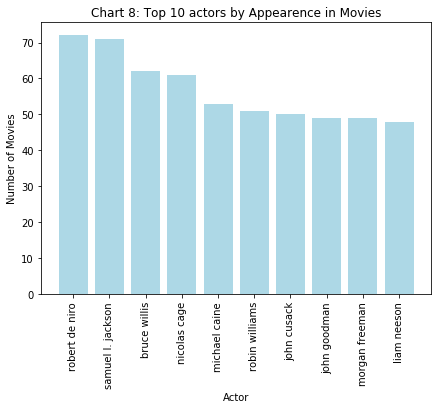

In [47]:
cast = df_movies_clean['cast']
dict_cast_and_appearances = count_occurrences(cast)
del dict_cast_and_appearances['not available']#previously we replaced all zero values with "Not available" 
#to be able to filter the value afterwards. This is what I am doing now.
sorted_dic_by_value = sorted(dict_cast_and_appearances.items(), reverse = True,  key=lambda x: x[1])

top_10 = 0
#Iterate over the sorted sequence to print out the top entries
x = []
y = []
for elem in sorted_dic_by_value:    
    x.append(elem[0])
    y.append(elem[1])
    top_10+=1
    if top_10 == 10:
        break


plt.figure(figsize = (7,5))
plt.bar(x,y, color = 'lightblue')
plt.xticks(rotation = "vertical")
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.title('Chart 8: Top 10 actors by Appearence in Movies');

#An article from "This pointer" was used to sort the dictionary 
#by its key value: https://thispointer.com/python-how-to-sort-a-dictionary-by-key-or-value/

Robert Deniro and Samuel L. Jackson were the two actors that appeared the largest number of times throughout the movies in the data set. 

#### What movie had the highest revenue?

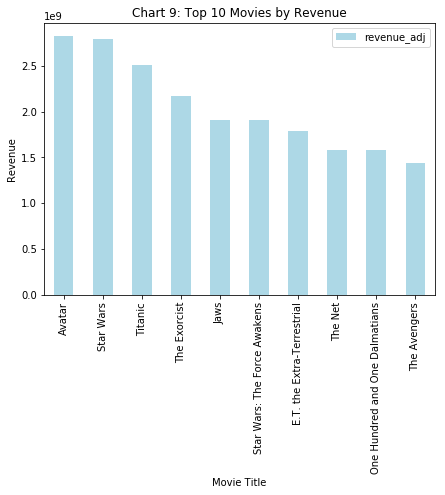

In [48]:
highest_rev = df_movies_clean[['original_title','revenue_adj','release_year']].nlargest(10, 'revenue_adj')
highest_rev.plot.bar('original_title', 'revenue_adj', color ="lightblue", figsize = (7,5))
plt.xlabel('Movie Title')
plt.ylabel('Revenue')
plt.title('Chart 9: Top 10 Movies by Revenue');

The movie with the highest revenue was "Avatar" in 2009 followed by "Star Wars" and the "Titanic". Interestingly, "Avatar" and "Star Wars" are not among the top ten movies with the highest budget (see following table). The "Titanic" is even in 5th place on budget spending. That means that these movies were specially profitable. 

#### What movie had the highest budget?

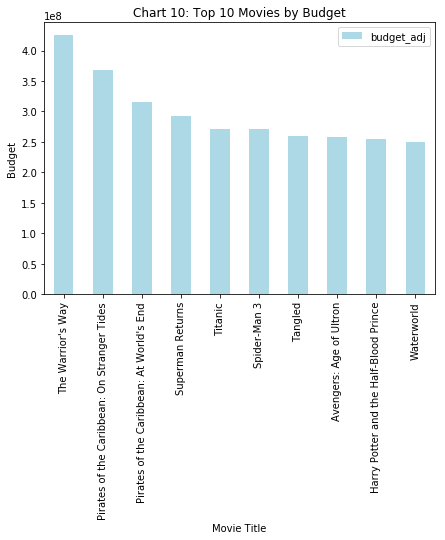

In [49]:
highest_bud =df_movies_clean[['original_title','budget_adj', 'release_year']].nlargest(10, 'budget_adj')
highest_bud.plot.bar('original_title', 'budget_adj', color ="lightblue", figsize = (7,5))
plt.xlabel('Movie Title')
plt.ylabel('Budget')
plt.title('Chart 10: Top 10 Movies by Budget');

The movie with the highest budget was "The Warrior's Way" in 2010. This movie is not among the top ten in revenue. The same is true for both "Pirate of the Caribbean" movies. 
This again points to the fact that budget and revenue may not have a strong relationship. 

### Exploration of variables that could impact economic success

#### Does a larger budget have an impact on movie success?

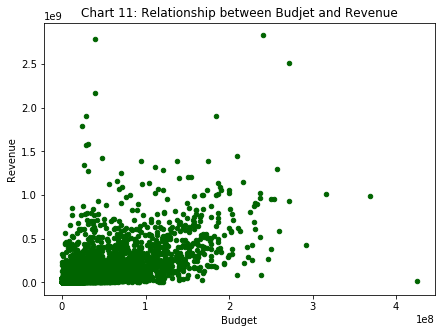

In [50]:
df_movies_clean.plot.scatter('budget_adj', 'revenue_adj', s=20 , c = "darkgreen", figsize = (7,5), legend = True)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Chart 11: Relationship between Budjet and Revenue');

In [51]:
np.corrcoef(df_movies_clean['budget_adj'], df_movies_clean['revenue_adj'])

array([[1.        , 0.60213341],
       [0.60213341, 1.        ]])

In [52]:
df_movies_clean.query('budget_adj > 3e8')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2243,0.250540,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,Boram Entertainment Inc.,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07
3374,4.955130,Pirates of the Caribbean: On Stranger Tides,Johnny Depp|PenÃ©lope Cruz|Geoffrey Rush|Ian M...,Rob Marshall,136.0,Adventure|Action|Fantasy,Walt Disney Pictures|Jerry Bruckheimer Films|M...,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08
7386,4.965391,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,Gore Verbinski,169.0,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09


Chart 11 shows the relationship of budget and revenue. The scatterplot shows a slight positive relationship between the two variables. To have a better measure of how strong the relationship is, I calculated the correlation coefficient and found a moderate relationship of about 0.6. That means that a larger budget could have a moderate impact on movie success. This makes sense, given that a larger budget would suggest a better cast, director, team, props, costumes, equipment, marketing and so on and this is turn could increase the quality and visibility of the movie. However, there are still multiple example of high budget movies that were not very successful as for example the "The Warrior's Way" or both "Pirates or the Caribbean" movies. Therefore I would not rely on a high budget to achieve a good economic success. 

#### Is popularity related to a better economic outcome?

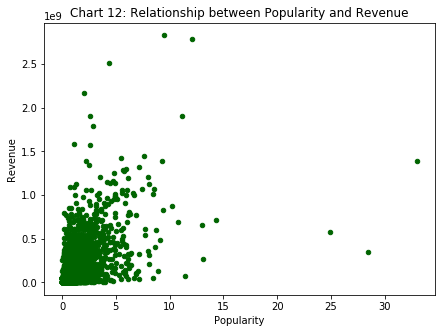

In [53]:
df_movies_clean.plot(x = 'popularity' , y = 'revenue_adj', kind = 'scatter', figsize =(7,5), color = "darkgreen");
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.title('Chart 12: Relationship between Popularity and Revenue');

In [54]:
np.corrcoef(df_movies_clean['popularity'], df_movies_clean['revenue_adj'])

array([[1.        , 0.57816235],
       [0.57816235, 1.        ]])

In [55]:
df_movies_clean.query('revenue_adj > 2.5e9')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121.0,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,1977-03-20,4428,7.9,1977,3.957559e+07,2.789712e+09
1386,9.432768,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,Ingenious Film Partners|Twentieth Century Fox ...,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09
5230,4.355219,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,Paramount Pictures|Twentieth Century Fox Film ...,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09


In [56]:
df_movies_clean.query('popularity > 25')

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08


As one can see on chart 12 there does not seem to be a strong relationship between the popularity of a movie and its economic success. The correlation coefficient here is also moderate at only 0.58. Interesting is also that most movies are clustered on the third quadrant of the chart. That means that most movies have a low popularity and low revenue. Only some outliers have achieved great revenue even though they were not very popular such as "Avatar" or the "Titanic" and also some very popular movies had a lower revenue such as "Mad Max: Fury Road". 

#### Is a genre related to a better economic outcome?

The question whether a genre has an impact on the economic success of a movie is interesting because it could give guidance to movie creators as to what type of genre has a better chance to generate more theater visits and therefore result in better revenue. A hypothesis could be for example that action movies results in better economic success because the public is more willing to go to cinemas to watch such a movie to fully enjoy the special effects through a big screen and a good sound system whereas they would rather watch a romantic comedy at home because the movie does not require the same experience. 

Given that most movies are tagged with multiple genres, it is very hard to build a relationship between one genre and economic success. To simplify the analysis and try to give an answer to the question we will assume that the first entry in the "genre" column represents the main genre for the movie and therefore is the most representative of the content. 

In [57]:
genre_columns = df_movies_clean['genres'].str.split(pat = '|', expand = True)
df_movies_clean = df_movies_clean.assign(main_genre = genre_columns[0])
df_movies_clean.head(5)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action


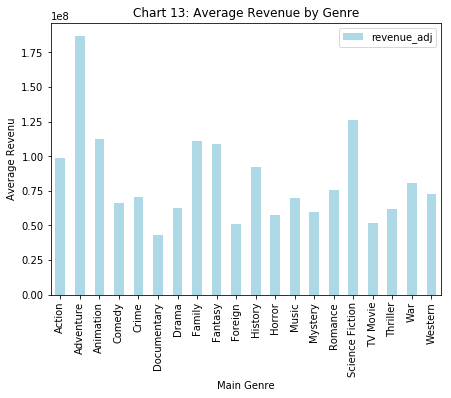

In [58]:
avg_revenue_by_genre = df_movies_clean[df_movies_clean['main_genre'] != 'Not available'].groupby(['main_genre'], as_index = False)['revenue_adj'].mean()

avg_revenue_by_genre.plot.bar('main_genre', 'revenue_adj', color = 'lightblue', figsize = (7,5))

plt.xlabel('Main Genre')
plt.ylabel('Average Revenu')
plt.title('Chart 13: Average Revenue by Genre' );

Chart 13 gives us an insight into the average revenue made over time by each main genre. From this we can see that "Adventure" has had the largest average revenue, followed by "Science Fiction" and "Animation". "Documentary" seem to be the genre with the least average revenue over time. If we take chart 7 into account, then the fact that "Adventure" for example presents such high average revenue is even more interesting, because there are in total not as many movies that were tagged with this genre. 
Also another question arises: Would the result change if we were to look at all movies that were tagged with one and the same genre regardless of it being the first or last tag? To dive into this question I will look at the three top genres "Adventure", "Science Fiction" and "Animation" and look at their appearances over all movies. 

In [59]:
#The goal of the following functions if to check if the tag "Adventure", "Science Fiction" or "Animation"
#was used on any of the movies. If the tag was used the funtion return a 1 if not it returns zero.
def count_adv(x):
    if "Adventure" in x:
        return 1
    else:
        return 0

def count_sf(x):
    if "Science Fiction" in x:
        return 1
    else:
        return 0
    
def count_ani(x):
    if "Animation" in x:
        return 1
    else:
        return 0

df_movies_clean['Adventure'] = df_movies_clean['genres'].apply(count_adv)
df_movies_clean['Science_Fiction'] = df_movies_clean['genres'].apply(count_sf)
df_movies_clean['Animation'] = df_movies_clean['genres'].apply(count_ani)
df_movies_clean.head(10)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,main_genre,Adventure,Science_Fiction,Animation
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,1,1,0
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,1,1,0
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,1,1,0
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,1,1,0
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,0,0,0
5,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,1.241999e+08,4.903142e+08,Western,1,0,0
6,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,1.425999e+08,4.053551e+08,Science Fiction,1,1,0
7,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,9.935996e+07,5.477497e+08,Drama,1,1,0
8,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,6.807997e+07,1.064192e+09,Family,1,0,1
9,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,1.609999e+08,7.854116e+08,Comedy,0,0,1


In [60]:
avg_rev_adv = df_movies_clean.groupby(['Adventure'], as_index = False)['revenue_adj'].mean()[1:]

In [61]:
avg_rev_sf = df_movies_clean.groupby(['Science_Fiction'], as_index = False)['revenue_adj'].mean()[1:]

In [62]:
avg_rev_ani = df_movies_clean.groupby(['Animation'], as_index = False)['revenue_adj'].mean()[1:]

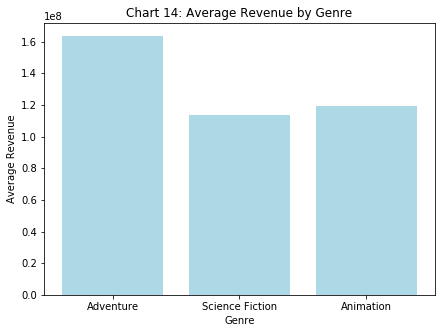

In [63]:
y = np.concatenate((avg_rev_adv['revenue_adj'].values,avg_rev_sf['revenue_adj'].values, avg_rev_ani['revenue_adj'].values))
x = ['Adventure', 'Science Fiction', 'Animation']

plt.figure(figsize = (7,5))
plt.bar(x,y, color = "lightblue")
plt.xlabel('Genre')
plt.ylabel('Average Revenue')
plt.title('Chart 14: Average Revenue by Genre');

Interestingly looking at the occurrence of the top three genres regardless of whether they were tagged first or last returns a very similar result to the previous analysis where only the main genre i.e. the genre that was provided as the first tag was taken into account. "Adventure" for example at 163 million in chart 14 is only about 14% behind the 189 million in chart 13. There is a similar situation with the two other genres. This is in my opinion very curious, given that in chart 14 one movie can appear multiple times because it is tagged with multiple genres, I expected the results to be influenced by more outliers and movies that maybe are just remotely related to the genre but were still tagged with it. Again taking into account chart 7, this does suggest that "Adventure" movies even though produced in smaller numbers are in average more successful. 

### Is a genre related to more popularity?

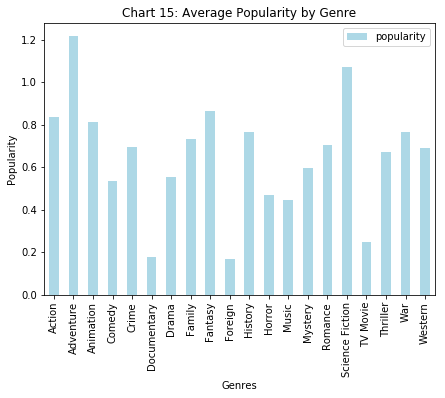

In [64]:
avg_popularity_by_genre = df_movies_clean[df_movies_clean['main_genre'] != 'Not available'].groupby(['main_genre'], as_index = False)['popularity'].mean()
avg_popularity_by_genre.plot.bar('main_genre', 'popularity', color = "lightblue", figsize =(7,5))

plt.legend()
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.title('Chart 15: Average Popularity by Genre');
plt.xticks(rotation = 'vertical');

Using the same logic as in chart 13 (taking into account only the first genre that was used as a tag) and grouping average popularity by genre we can see that the top three genres by average revenue (chart 13) are also under the best performing in popularity. The clear winner is "Adventure", followed by "Science Fiction" and "Fantasy". "Animation turns out 5th. "Documentary" is also very low in popularity. This suggests that the popularity of a genre could be related to the average revenue it makes.

#### Is there a relationship between the season the movie was released at and the success of the movie?
In the TV industry viewership decreases during the summer time because people are traveling, enjoying the weather or just have a different routine because of vacation time of their children and therefore don't watch TV as usual. On the other side on autumn and winter months viewership is high, which is the reason why many popular TV series are released in October. Therefore revenue normally also decreases during summer and increases during winter. To investigate if there is a similar trend in the movie industry I will look at the average revenue by season over time. 

In [65]:
def what_season(input_series):
    '''This function takes as input a series object, converts it to a date time object
    and then allocates the month to a certain season and returns the season for the month'''
    input_series = pd.to_datetime(input_series, infer_datetime_format = True)
    if 3 <= input_series.month <= 5:
        return 'spring'
    elif 6 <= input_series.month <= 8:
        return 'summer'
    elif 9 <= input_series.month <= 11:
        return 'autumn'
    else:
        return 'winter'
        

release_seasons = df_movies_clean['release_date'].apply(what_season)
df_movies_clean = df_movies.assign(release_season = release_seasons)
df_movies_clean.head()

#All date information from:
#https://www.timeanddate.com/calendar/aboutseasons.html northern meteorological season

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_season
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,summer
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,spring
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,spring
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,winter
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,spring


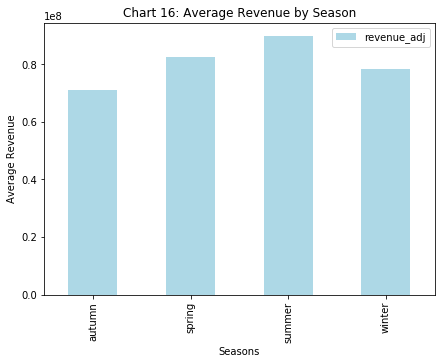

In [66]:
revenue_by_season = df_movies_clean.groupby(['release_season'],as_index = False)['revenue_adj'].mean()
revenue_by_season.plot.bar('release_season', 'revenue_adj', color = 'lightblue', figsize =(7,5))

plt.xlabel('Seasons')
plt.ylabel('Average Revenue')
plt.title('Chart 16: Average Revenue by Season');

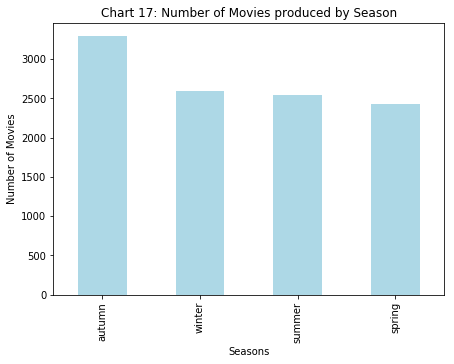

In [67]:
df_movies_clean['release_season'].value_counts().plot(kind ='bar', color = 'lightblue', figsize = (7,5))

plt.xlabel('Seasons')
plt.ylabel('Number of Movies')
plt.title('Chart 17: Number of Movies produced by Season');

Chart 16 shows that summer is the season with the highest average revenue, followed by spring, winter and autumn. This is specially interesting given that in chart 17 we can see that in the summer there are far less movies produced than in autumn where revenue is the lowest. This means that less movies achieve a better economic outcome. Therefore there seems to be a relationship between the season of the release and the average revenue that can be achieved. A reason could be that in summer months people have more free time and can go to the cinema more often, while in autumn and in winter they are too busy go to theaters. 

<a id='conclusions'></a>
## Conclusions

In this analysis we gained following insights:
1. There were more than 7,800 production firms involved in the production of movies since 1960
2. There are about 2 procution movies involved in the production of a movie
3. The amount of movies has increased steadily over time and achieved its highest level in 2015
4. Average Revenue has been steadily decreasing
5. Budget increased after the 1970 and decreased again after aroung 2000
6. Popularity has been increasing since the 1960 but always at a very low level that has only been above average in recent years
7. Average Runtime has decreased over time and is aroung 90 minutes in recent years
8. "Drama" and "Comedy" are the two genres that were used for tagging most often
9. Robert De Niro and Samuel L.Jackson were the two actors that appeared most often
10. "Avatar", "Star Wars" and the "Titanic" were the movies with the highest budget
11. "The Warrio's Ways" and the Pirate of the Caribbean movies where the ones with the highest budget

And we also looked for relationships between variables and economic success:
1. We found that a higher budget is only moderately related to a better economic success.
2. Popularity has also a low impact on a movies economic success.
3. "Aventure" movies seem to have a higher return
4. "Adventure" and Science fiction seem to be the most popular genres
5. The summer seems to be the season with the highest average revenue. 

These findings, while interesting, have to be considered carefully since the results could be caused by other variables that are not apparent in this analysis. For example the moderate relationship between revenue and budget could be caused by better staff or better special effects and not the budget itself. Or the "Adventure" movies may perform better just because people prefer to watch them in theaters whereas they will watch a romantic comedy at home. In short, we can not assume that the discovered relationships caused the economic success of a movie. 

__Limitations__

There are multiple limitation encountered during this analysis:
1. The analysis of this data set is limited to the variables provided by the data set and what this variables made possible.
2. We had multiple categorical variables (cast, director, production companies), which does not allow us to conduct statisctical analysis.
3. For values such as revenue and budjet we were limited to numerical values of these variables and did not conduct any normalization, currency conversion or took into account exchange rates. We also had no information as to where the revenue came from (US or global).
4. There is no exact information about how variables such as popularity or vote_count are measures, therefore there is no way of assessing if a value is good or bad other than comparing it to is mean. 
5. We have no information whether in fact all movies are entered into the data set or if maybe some movies are not listed at all, so there might be data missing that we do not know about and that could impact the results we had.
6. Dropping, replacing and filling missing values or values with a zero might skew our analyisis and impact its quality.

<a id='source'></a>
# Sources

- (1) https://deadline.com/2018/07/film-industry-revenue-2017-ibisworld-report-gloomy-box-office-1202425692/
- (2) https://docs.python.org/3/library/time.html 